차원축소(PCA,주성분분석)

- 여러 변수들의 변량을 '주성분'이라고 불리는, 서로 상관성이 높은 여러 변수들의 선형조합으로 만든 새로운 변수들로 요약, 축소하는 기법

- 첫번째 주성분으로 잔체 변돋을 가장 많이 설명할 수 있다.

In [ ]:
# iris 붓꽆데이터 준비

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("https://raw.githubusercontent.com/YoungJinBD/dataset/main/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df = iris.drop(['species'],axis=1)

df_species = iris['species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# PCA 분석 - 변수간의 스케일 차이가 많이 나면 스케일이 큰 변수가 주성분에 영향을 많이 주기 때문에 주성분 분석 전에 변수를 표준화 하거나 정규화 시켜준다.

# 변수 정규화
from sklearn.preprocessing import StandardScaler

df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])
df['petal_length'] = StandardScaler().fit_transform(df[['petal_length']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])

# PCA 수행
from sklearn.decomposition import PCA

pca = PCA(n_components=4) # 변환할 차원의 수를 의미

p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


설명: 원본 데이터 셋을 (150,4)의 배열로 변환됨을 알수 있으며, pca.explained_variance_ratio_ 변수는 각각의 차원의 기여도를 보여준다.

첫 번쨰 PCA 변환요소(차원)만으로 전체 변동성의 약 73%의 설명이 가능하고, 두 번째 요소는 22.8% 를 차지한다.

따라서. 2개의 차원만으로만 변환해도 원본 데이터의 변동성을 95.8% 설명 가능하므로, 변수를 원래 4개에서 2개로 줄일 수 있다.

- 변수가 늘어날수록 축의 개수가 늘어난다 -> 차원이 늘어난다는 소리
- 주성분 분석으로 인해 변수 4개의 (차원 4개)성분을 두 개의 주성분으로 줄여서 나타낼 수 있다,

# 붓꽃 데이터를 이용한 주성분 데이터분석

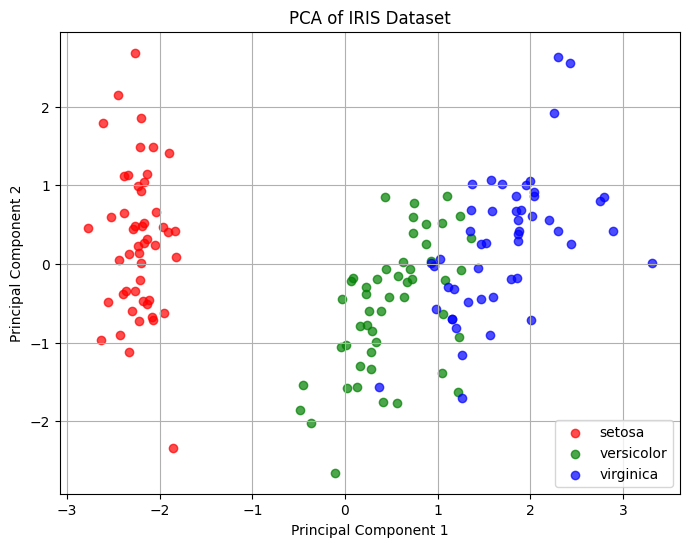

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data  # 꽃받침/꽃잎 길이 및 너비
y = iris.target  # 품종 (0: setosa, 1: versicolor, 2: virginica)
target_names = iris.target_names

# 2. 데이터 표준화 (스케일 맞추기)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 결과 시각화
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, target_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        alpha=0.7, color=colors[i], label=target_name
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.grid(True)
plt.show()

PCA로 4차원 데이터를 2차원으로 줄였지만, 품종별로 어느 정도 구분되는 걸 확인할 수 있습니다.

**PC1(주성분1)**과 **PC2(주성분2)**는 데이터의 분산(정보)을 가장 많이 담고 있는 축입니다.
- 제1주성분 축: 데이터의 분산을 가장 많이 설명할 수 있는 방향의 축
- 제2주성분 축: 제1주성분과 직교하며 남은 분산을 최대한 설명하는 방향의 축
---
원래 데이터는 변수가 4개인, 차원이4차원인 데이터 셋이다. 하지만 주성분 분석으로 인해서 차원을 2개로 줄여도 충분히 모델 설명이 가능하다는 것을 알고 차원 숙소를 한 후 시각화를 진행하였다.

**차원이 축소가 된다면, 클러스터링 분석, SVM 등의 분류 머신러닝을 만들 경우 분류 성능이 높아질 수 있는 가능성이 있는 데이터라고 할 수 있다.**